In [1]:
import networkx as nx
import matplotlib.pyplot as plt

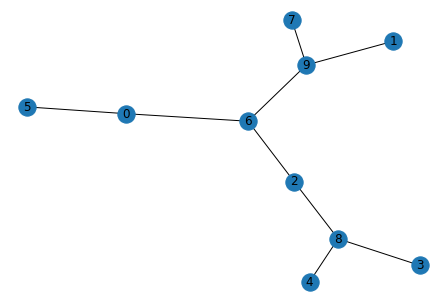

In [2]:
G = nx.Graph()

G.add_edge(0,5)
G.add_edge(0,6)
G.add_edge(9,6)
G.add_edge(9,7)
G.add_edge(9,1)
G.add_edge(6,2)
G.add_edge(2,8)
G.add_edge(8,3)
G.add_edge(8,4)

nx.draw(G, with_labels = 1)

In [3]:
nod = []
dc = []
cc =[]
bc = []

## Degree Centrality

In [4]:
degrees = [val for (node, val) in G.degree()]
nodes  = [node for (node, val) in G.degree()]

In [5]:
def deg_cen(degrees, nodes):
    i =0
    
    while i<len(nodes):
        print('Node no.',nodes[i],"Deg_centality :",degrees[i]/(len(G)-1))
        dc.append(round(degrees[i]/(len(G)-1),2))
        nod.append(nodes[i])
        i += 1
    print(dc, nod)
    return dc,nod

In [6]:
deg_cen(degrees, nodes)
len(G.nodes())

Node no. 0 Deg_centality : 0.2222222222222222
Node no. 5 Deg_centality : 0.1111111111111111
Node no. 6 Deg_centality : 0.3333333333333333
Node no. 9 Deg_centality : 0.3333333333333333
Node no. 7 Deg_centality : 0.1111111111111111
Node no. 1 Deg_centality : 0.1111111111111111
Node no. 2 Deg_centality : 0.2222222222222222
Node no. 8 Deg_centality : 0.3333333333333333
Node no. 3 Deg_centality : 0.1111111111111111
Node no. 4 Deg_centality : 0.1111111111111111
[0.22, 0.11, 0.33, 0.33, 0.11, 0.11, 0.22, 0.33, 0.11, 0.11] [0, 5, 6, 9, 7, 1, 2, 8, 3, 4]


10

## Closeness Centrality

In [7]:
def closeness_centrality(G):
    
    for i in range (0, len(G.nodes())):
        sum_ = 0
        centratlity = 0
        lenght = len(G.nodes())

        for j in range (0, lenght):
            sp = nx.shortest_path(G,j,i)
            sum_ += len(sp)-1
        centrality= sum_/(lenght-1)
        cc.append(round(centrality,2))
    
    return cc
    

In [8]:
closeness_centrality(G)


[2.56, 3.22, 2.11, 3.44, 3.44, 3.44, 1.89, 3.22, 2.56, 2.33]

## Betweenness Centrality

In [9]:

def betweenness_centrality(Nodes, len1):
    
    for n in Nodes:
        betweeness_centrality = 0
        count=0

        for i in range(0, len1):
            for j in range(i+1, len1):
                sp = list(nx.all_shortest_paths(G, i, j))

                count = 0
                for p in sp:
                    between = len(p)-2
                    if between >=1:
                        x=1
                        while x<=between:
                            if p[x]==n:
                                count+=1
                            x+=1
                k=len(nx.shortest_path(G, i, j))-2

                if count>=1 and k>=1:
                    betweeness_centrality+=count/len(sp)
                   
                else:
                    pass
        bc.append(betweeness_centrality)
    return bc
        

In [10]:
Nodes = G.nodes()
len1 = len(nodes)

betweenness_centrality(Nodes, len1)

[8.0, 0, 26.0, 15.0, 0, 0, 18.0, 15.0, 0, 0]

In [11]:
import pandas as pd
df = pd.DataFrame(list(zip(nod,dc,cc,bc)), columns = ['nodes', 'degree_centrality', "closeness_centrality","betweenness_centrlaity"])

In [12]:
df

,nodes,degree_centrality,closeness_centrality,betweenness_centrlaity
0,0,0.22,2.56,8.0
1,5,0.11,3.22,0.0
2,6,0.33,2.11,26.0
3,9,0.33,3.44,15.0
4,7,0.11,3.44,0.0
5,1,0.11,3.44,0.0
6,2,0.22,1.89,18.0
7,8,0.33,3.22,15.0
8,3,0.11,2.56,0.0
9,4,0.11,2.33,0.0


In [13]:
 df.sort_values(by=['nodes'])

,nodes,degree_centrality,closeness_centrality,betweenness_centrlaity
0,0,0.22,2.56,8.0
5,1,0.11,3.44,0.0
6,2,0.22,1.89,18.0
8,3,0.11,2.56,0.0
9,4,0.11,2.33,0.0
1,5,0.11,3.22,0.0
2,6,0.33,2.11,26.0
4,7,0.11,3.44,0.0
7,8,0.33,3.22,15.0
3,9,0.33,3.44,15.0


### Conclusion

### The node 6 is important node in the graph with highest betweenness centrality in the graph quantifyin the importance of the information flow and easy to access by all the nodes in the graph with relative higher closeness and the degree centrality .